In [1]:
import cv2
import os
import mediapipe as mp
import scipy
from scipy.signal import find_peaks, argrelmin
import matplotlib.pyplot as plt
import tkinter as tk
import pandas as pd
import numpy as np

In [2]:
class PoseEstimationModel:
    
    def __init__(self, path):
        self.video_path = path
        self.mp_drawing = mp.solutions.drawing_utils
        self.mp_pose = mp.solutions.pose
        self.pose = self.mp_pose.Pose(min_detection_confidence=0.6, min_tracking_confidence=0.6)
        self.cap = cv2.VideoCapture(path)
        
    def display_video_with_keypoints(self):

        while self.cap.isOpened():
            _, frame = self.cap.read()

            try:
                RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                results = self.pose.process(RGB)

                if results.pose_landmarks is not None:
                    keypoints_labels = {
                        self.mp_pose.PoseLandmark.LEFT_ANKLE: 'LEFT ANKLE',
                        self.mp_pose.PoseLandmark.RIGHT_ANKLE: 'RIGHT ANKLE',
                    }

                    for landmark in self.mp_pose.PoseLandmark:
                        if landmark in keypoints_labels.keys():
                            landmark_index = landmark.value
                            landmark_name = keypoints_labels[landmark]
                            data_point = results.pose_landmarks.landmark[landmark_index]
                            x = data_point.x * frame.shape[1]  
                            y = data_point.y * frame.shape[0]  

                            # Draw a label near the keypoint
                            cv2.putText(frame, f"{landmark_name}", (int(x), int(y) - 10),
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

                # Draw detected skeleton on the frame
                self.mp_drawing.draw_landmarks(
                    frame, results.pose_landmarks, self.mp_pose.POSE_CONNECTIONS)

                # Show the final output
                cv2.imshow('Output', frame)

            except:
                break

            if cv2.waitKey(1) == ord('q'):
                break

        self.cap.release()
        cv2.destroyAllWindows()
        
    def create_keypoint_dataframe(self): 

        time = []

        right_ankle_x = []
        right_ankle_y = []

        left_ankle_x = []
        left_ankle_y = []

        right_heel_x = []
        right_heel_y = []

        left_heel_x = []
        left_heel_y = []

        right_knee_x = []
        right_knee_y = []

        left_knee_x = []
        left_knee_y = []

        right_foot_index_x = []
        right_foot_index_y = []

        left_foot_index_x = []
        left_foot_index_y = []

        right_hip_x = []
        right_hip_y = []
        left_hip_x = []
        left_hip_y = []

        left_shoulder_x = []
        right_shoulder_x = []

        frame_width = int(self.cap.get(cv2.CAP_PROP_FRAME_WIDTH))

        while self.cap.isOpened():
            _, frame = self.cap.read()

            try:
                RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                results = self.pose.process(RGB)

                if results.pose_landmarks is not None:
                    keypoints_labels = {
                        self.mp_pose.PoseLandmark.LEFT_ANKLE,
                        self.mp_pose.PoseLandmark.LEFT_KNEE,
                        self.mp_pose.PoseLandmark.LEFT_HEEL,
                        self.mp_pose.PoseLandmark.LEFT_FOOT_INDEX,
                        self.mp_pose.PoseLandmark.LEFT_HIP,
                        self.mp_pose.PoseLandmark.LEFT_SHOULDER,

                        self.mp_pose.PoseLandmark.RIGHT_ANKLE,
                        self.mp_pose.PoseLandmark.RIGHT_KNEE,
                        self.mp_pose.PoseLandmark.RIGHT_HEEL,
                        self.mp_pose.PoseLandmark.RIGHT_FOOT_INDEX,
                        self.mp_pose.PoseLandmark.RIGHT_HIP,
                        self.mp_pose.PoseLandmark.RIGHT_SHOULDER,
                    }

                    time.append(self.cap.get(cv2.CAP_PROP_POS_MSEC))

                    for landmark in self.mp_pose.PoseLandmark:
                        if landmark in keypoints_labels:
                            landmark_index = landmark.value
                            data_point = results.pose_landmarks.landmark[landmark_index]
                            x = data_point.x * frame.shape[1] 
                            y = data_point.y * frame.shape[0]  

                            if landmark == self.mp_pose.PoseLandmark.RIGHT_ANKLE:
                                right_ankle_x.append(int(x))
                                right_ankle_y.append(int(y))

                            elif landmark == self.mp_pose.PoseLandmark.LEFT_ANKLE:
                                left_ankle_x.append(int(x))
                                left_ankle_y.append(int(y))

                            elif landmark == self.mp_pose.PoseLandmark.RIGHT_HEEL:
                                right_heel_x.append(int(x))
                                right_heel_y.append(int(y))

                            elif landmark == self.mp_pose.PoseLandmark.LEFT_HEEL:
                                left_heel_x.append(int(x))
                                left_heel_y.append(int(y))
                                
                            elif landmark == self.mp_pose.PoseLandmark.RIGHT_KNEE:
                                right_knee_x.append(int(x))
                                right_knee_y.append(int(y))

                            elif landmark == self.mp_pose.PoseLandmark.LEFT_KNEE:
                                left_knee_x.append(int(x))
                                left_knee_y.append(int(y))

                            elif landmark == self.mp_pose.PoseLandmark.RIGHT_FOOT_INDEX:
                                right_foot_index_x.append(int(x))
                                right_foot_index_y.append(int(y))

                            elif landmark == self.mp_pose.PoseLandmark.LEFT_FOOT_INDEX:
                                left_foot_index_x.append(int(x))
                                left_foot_index_y.append(int(y))

                            elif landmark == self.mp_pose.PoseLandmark.RIGHT_HIP:
                                right_hip_x.append(int(x))
                                right_hip_y.append(int(y))

                            elif landmark == self.mp_pose.PoseLandmark.LEFT_HIP:
                                left_hip_x.append(int(x))
                                left_hip_y.append(int(y))

            except:
                break

            if cv2.waitKey(1) == ord('q'):
                break

        self.cap.release()
        cv2.destroyAllWindows()
        
        pelvis_x = ((np.array(right_hip_x) + np.array(left_hip_x)) / 2).tolist()

        data = {
            'time': np.array(time) / 1000,
            'right_ankle_x': right_ankle_x,
            'right_ankle_y': right_ankle_y,
            'left_ankle_x': left_ankle_x,
            'left_ankle_y': left_ankle_y,
            'right_heel_x': right_heel_x,
            'right_heel_y': right_heel_y,
            'left_heel_x': left_heel_x,
            'left_heel_y': left_heel_y,
            'right_knee_x': right_knee_x,
            'right_knee_y': right_knee_y,
            'left_knee_x': left_knee_x,
            'left_knee_y': left_knee_y,
            'right_foot_index_x': right_foot_index_x,
            'right_foot_index_y': right_foot_index_y,
            'left_foot_index_x': left_foot_index_x,
            'left_foot_index_y': left_foot_index_y,
            'left_hip_x': left_hip_x,
            'left_hip_y': left_hip_y,
            'right_hip_x': right_hip_x,
            'right_hip_y': right_hip_y,
            'pelvis_x': pelvis_x
        }

        df = pd.DataFrame(data)
        df = df[df['time'] > 0]  # Remove erroneous initial points
        return df, frame_width

In [3]:
def plot_keypoints(time_col, left_keypoint_col, right_keypoint_col):
    plt.figure(figsize=(10, 6))

    plt.scatter(time_col, left_keypoint_col, label="Left Keypoint Position", s=20)
    plt.scatter(time_col, right_keypoint_col, label="Right Keypoint Position", s=20)
        
    plt.xlabel('Time (seconds)')
    plt.ylabel("Horizontal Ankle Positions (pixels)")
    plt.title('Horizontal Ankle Positions over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
def swap(df, index, left_keypoint, right_keypoint):
    """
    Swap values in a DataFrame at a specific index between left and right keypoints.

    Parameters:
    - df: The DataFrame to perform the swap on.
    - index: The index of the row to swap.
    - left_keypoint: The column name for the left keypoint.
    - right_keypoint: The column name for the right keypoint.
    
    Returns:
    None (swaps in place)
    """
    temp = df.at[index, right_keypoint]
    df.at[index, right_keypoint] = df.at[index, left_keypoint]
    df.at[index, left_keypoint] = temp

def swap_in_range(df, start, end, left_keypoint, right_keypoint):
    """
    Swap values within a specified time range in a DataFrame between left and right keypoints.

    Parameters:
    - df: The DataFrame to perform the swap on.
    - start: The start time of the range for swapping.
    - end: The end time of the range for swapping.
    - left_keypoint: The column name for the left keypoint.
    - right_keypoint: The column name for the right keypoint.
    """
    for index, row in df.iterrows():
        if start <= row['time'] <= end:
            left_curr_value = row[left_keypoint]
            right_curr_value = row[right_keypoint]
            swap(df, index, left_keypoint, right_keypoint, left_curr_value, right_curr_value)

def swap_keypoints_range(start, end):       
    swap_in_range(df, start, end, "left_ankle_x", "right_ankle_x")
    swap_in_range(df, start, end, "left_heel_x", "right_heel_x")
    swap_in_range(df, start, end, "left_foot_index_x", "right_foot_index_x")


In [5]:
def switch_left_right(df, left_keypoint, right_keypoint, threshold, window_size):
    """
    Corrects incorrectly classified left and right keypoints in a DataFrame by swapping or applying a moving average.

    Parameters:
    - df: The DataFrame containing keypoint data.
    - left_keypoint: The column name for the left keypoint.
    - right_keypoint: The column name for the right keypoint.
    - threshold: The threshold for detecting incorrect keypoints that need correction.
    - window_size: The window size for computing the moving average.
    """
    
    left_prev = df[left_keypoint].iloc[0]
    right_prev = df[right_keypoint].iloc[0]
    
    for index, rows in df.iterrows():
        left_curr = df[left_keypoint].iloc[index]
        right_curr = df[right_keypoint].iloc[index]
        
        left_dif = distance_between(left_curr, left_prev) 
        right_dif = distance_between(right_curr, right_prev) 
        
        # Swap keypoints if the distance between the current and previous keypoints exceeds the threshold
        if left_dif > threshold and right_dif > threshold:
            swap(df, index, left_keypoint, right_keypoint, left_curr, right_curr)
            
        # Recalculate current distances
        new_left = df[left_keypoint].iloc[index]
        new_right = df[right_keypoint].iloc[index]
        
        # If a keypoint exceeds the threshold after a swap, correct the keypoint with a moving average
        if distance_between(new_left, left_prev) > threshold:
            left_ma = df[left_keypoint].iloc[max(0, index - window_size + 1):index + 1].mean()
            df.at[index, left_keypoint] = left_ma
            
        if distance_between(new_right, right_prev) > threshold:
            right_ma = df[right_keypoint].iloc[max(0, index - window_size + 1):index + 1].mean()
            df.at[index, right_keypoint] = right_ma

        left_prev = df[left_keypoint].iloc[index]
        right_prev = df[right_keypoint].iloc[index]
        
        
def distance_between(curr, prev):
    return abs(curr - prev)

In [6]:
# Calculates the horizontal distance between the ankles and pelvis
def calc_distance_ankle_pelvis(df, ankle_pos_col):
    """
    Calculate the horizontal distance between the specified ankle and pelvis keypoints in a DataFrame.

    Parameters:
    - df: The DataFrame containing keypoint data.
    - ankle: The column name for the ankle landmark (e.g., 'left_ankle_x' or 'right_ankle_x').

    Returns:
    - ankle_pelvis_distance: A pandas Series representing the horizontal distance between ankle and pelvis at each time point.
    """
    
    pelvis_x = df['pelvis_x']
    ankle_pelvis_distance = ankle_pos_col - pelvis_x
    return ankle_pelvis_distance

def graph_ankle_pelvis_distance(time_col, left_ankle_pelvis_col, right_ankle_pelvis_col):
    plt.plot(time_col, left_ankle_pelvis_col, linestyle='-', label='Left ankle and pelvis distance', color='blue')
    plt.plot(time_col, right_ankle_pelvis_col, linestyle='-', label='Right ankle and pelvis distance', color='red')
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Ankle-Pelvis Horizontal Distance (Pixels)')
    plt.title('Ankle-Pelvis Horizontal Distance Time Series (Pixels)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [7]:
def find_maxima(time_col, ankle_distance_col, window_size):
    """
    Find local maxima in a curve.

    Parameters:
    - time_col: A pandas Series containing time values.
    - ankle_distance_col: A pandas Series representing the distance between ankles.
    - window_size: The width parameter for peak detection.

    Returns:
    - maxima: A NumPy array containing (time, value) pairs for the maxima.
    """
    max_peaks, _ = find_peaks(ankle_distance_col.values, width=window_size)
    max_times = time_col.iloc[max_peaks].values
    max_vals = ankle_distance_col.iloc[max_peaks].values
    maxima = np.column_stack((max_times, max_vals))
    return maxima

def find_minima(time_col, ankle_distance_col, window_size):
    """
    Find local minima in a curve.

    Parameters:
    - time_col: A pandas Series containing time values.
    - ankle_distance_col: A pandas Series representing the distance between ankles.
    - window_size: The width parameter for peak detection.

    Returns:
    - minima: A NumPy array containing (time, value) pairs for the minima.
    """
    min_peaks, _ = find_peaks(-ankle_distance_col.values, width=window_size)
    min_times = time_col.iloc[min_peaks].values
    min_vals = ankle_distance_col.iloc[min_peaks].values
    minima = np.column_stack((min_times, min_vals))
    return minima

def graph_extrema(time, curve, heel_strikes, toe_offs):
    plt.figure(figsize=(10, 6))

    plt.plot(time, curve, color='b')

    # Plot the maxima and minima on the original curve
    plt.plot(heel_strikes[:, 0], heel_strikes[:, 1], 'ro', label='Heel Strikes', markersize=5)
    plt.plot(toe_offs[:, 0], toe_offs[:, 1], 'go', label='Toe Offs', markersize=5)

    plt.xlabel('Time (Seconds)')
    plt.ylabel('Horizontal Distance between Pelvis and Ankles (Pixels)')
    plt.title('Horizontal Distance Between Pelvis and Ankles over Time')
    plt.legend()
    plt.grid(True)

    plt.show()


In [8]:
def calc_midpoints(arr_1, arr_2):
    """
    Calculate the time of midpoints between two arrays of events (e.g., toe-offs and heel strikes).

    Parameters:
    - arr_1: A NumPy array containing event times (e.g., toe-off times).
    - arr_2: A NumPy array containing event times (e.g., heel strike times).

    Returns:
    - np_time_dif: A NumPy array containing the time differences between corresponding events.
    """
    
    index_1 = 0
    index_2 = 0
    time_dif = []
    
    while index_1 < arr_1.shape[0] and index_2 < arr_2.shape[0]:
        time_1 = arr_1[index_1, 0]
        time_2 = arr_2[index_2, 0]

        index_2 += 1
        if time_1 <= time_2:
            time_dif.append(time_2 - time_1)
            index_1 += 1
            
#         print(str(time_1) + " " + str(time_2))
    
    np_time_dif = np.array(time_dif)

In [9]:
def calc_angle_between(df, keypoint_1, keypoint_2, keypoint_3):
    """
    Calculate the angle in degrees between three keypoints at each time point in a DataFrame.

    Parameters:
    - df: The DataFrame containing keypoint data.
    - keypoint_1: The name of the starting keypoint (e.g. 'right_hip').
    - keypoint_2: The name of the middle keypoint (e.g. 'knee').
    - keypoint_3: The name of the ending keypoint (e.g. 'right_ankle').

    Returns:
    - angles: A list containing the calculated angles in degrees for each time point.
    """
    
    angles = []
    for index, row in df.iterrows():
        
        # X Y coordinates for each keypoint
        coordinates = {
            keypoint_1: np.array([row[keypoint_1 + '_x'], row[keypoint_1 + '_y']]),
            keypoint_2: np.array([row[keypoint_2 + '_x'], row[keypoint_2 + '_y']]),
            keypoint_3: np.array([row[keypoint_3 + '_x'], row[keypoint_3 + '_y']])
        }
        
        vector1 = coordinates[keypoint_1] - coordinates[keypoint_2]
        vector2 = coordinates[keypoint_3] - coordinates[keypoint_2]
        
        dot_product = np.dot(vector1, vector2)
        magnitude1 = np.linalg.norm(vector1)
        magnitude2 = np.linalg.norm(vector2)
        
        cos_angle = dot_product / (magnitude1 * magnitude2)
        
        angle_radians = np.arccos(cos_angle)
        angle_degrees = np.degrees(angle_radians)
        
        angles.append(angle_degrees)
        
    return angles

def add_keypoint_angles(df):
    df['right_knee_angles'] = calc_angle_between(df, 'right_hip', 'right_knee', 'right_ankle')
    df['left_knee_angles'] = calc_angle_between(df, 'left_hip', 'left_knee', 'left_ankle')

    df['right_ankle_angles'] = calc_angle_between(df, 'right_knee', 'right_ankle', 'right_foot_index')
    df['left_ankle_angles'] = calc_angle_between(df, 'left_knee', 'left_ankle', 'left_foot_index')

In [10]:
def graphKneeAngles(df):
    plt.plot(df['time'], df['right_knee_angles'], label='Right Knee Angle')
    plt.plot(df['time'], df['left_knee_angles'], label='Left Knee Angle')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Angle (degrees)')
    plt.title('Knee Angle over Time')
    plt.legend()
    plt.grid()
    plt.show()

def graphAnkleAngles(df):
    plt.plot(df['time'], df['right_ankle_angles'], label='Right Ankle Angle')
    plt.plot(df['time'], df['left_ankle_angles'], label='Left Ankle Angle')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Angle (degrees)')
    plt.title('Ankle Angle over Time')
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
# Find knee and ankle angles at heel-strikes and toe-offs
def get_angles_at_event(df, event_arr, event):
    angles = []
    for i in range(0, len(event_arr)):
        time = event_arr[i, 0]
        angle = df[df['time'] == time][event].values[0]
        angles.append(angle)
#     print(angles)
    return angles

In [12]:
def get_angle_keypoints():

    # Angles at left heel-strikes
    right_knee_angles_left_heel = get_angles_at_event(df_angles, left_heel_strike, 'right_knee_angles')
    left_knee_angles_left_heel = get_angles_at_event(df_angles, left_heel_strike, 'left_knee_angles')
    right_ankle_angles_left_heel = get_angles_at_event(df_angles, left_heel_strike, 'right_ankle_angles')
    left_ankle_angles_left_heel = get_angles_at_event(df_angles, left_heel_strike, 'left_ankle_angles')

    # Angles at right heel-strikes
    right_knee_angles_left_heel = get_angles_at_event(df_angles, right_heel_strike, 'right_knee_angles')
    left_knee_angles_left_heel = get_angles_at_event(df_angles, right_heel_strike, 'left_knee_angles')
    right_ankle_angles_left_heel = get_angles_at_event(df_angles, right_heel_strike, 'right_ankle_angles')
    left_ankle_angles_left_heel = get_angles_at_event(df_angles, right_heel_strike, 'left_ankle_angles')

    # Angles at left toe-offs
    right_knee_angles_left_heel = get_angles_at_event(df_angles, left_toe_off, 'right_knee_angles')
    left_knee_angles_left_heel = get_angles_at_event(df_angles, left_toe_off, 'left_knee_angles')
    right_ankle_angles_left_heel = get_angles_at_event(df_angles, left_toe_off, 'right_ankle_angles')
    left_ankle_angles_left_heel = get_angles_at_event(df_angles, left_toe_off, 'left_ankle_angles')

    # Angles at right toe-offs
    right_knee_angles_left_heel = get_angles_at_event(df_angles, right_toe_off, 'right_knee_angles')
    left_knee_angles_left_heel = get_angles_at_event(df_angles, right_toe_off, 'left_knee_angles')
    right_ankle_angles_left_heel = get_angles_at_event(df_angles, right_toe_off, 'right_ankle_angles')
    left_ankle_angles_left_heel = get_angles_at_event(df_angles, right_toe_off, 'left_ankle_angles')

In [13]:
def calc_step_time(heel_strikes):
    """
    Calculates the time intervals between consecutive heel strikes.

    Parameters:
    - heel_strikes: A NumPy array containing event times and positions.

    Returns:
    - step_time: A list of time intervals between consecutive events.
    """
    
    step_time = []
    
    for i in range(0, len(heel_strikes) - 1):
        dif = heel_strikes[i + 1, 0] - heel_strikes[i, 0]
        step_time.append(dif)
        
    return step_time

In [14]:
def calc_time_between(event_1, event_2):
    """
    Calculates the time intervals between consecutive events in an array of event times.

    Parameters:
    - heel_strikes: A NumPy array containing event times and positions.

    Returns:
    - time_dif: A list of time intervals between two consecutive events.
    """
    
    index_1 = 0
    index_2 = 0
    time_dif = []
    
    while index_1 < event_1.shape[0] and index_2 < event_2.shape[0]:
        time_1 = event_1[index_1, 0]
        time_2 = event_2[index_2, 0]

        index_2 += 1
        if time_1 <= time_2:
            time_dif.append(time_2 - time_1)
            index_1 += 1
    
    return time_dif


In [15]:
def calc_step_length(df, heel_strikes, ankle_col_name, frame_width, walkway_length):
    print(frame_width)
    print(walkway_length)
    """
    Calculates the step length using ankle keypoints at heel-strikes.

    Parameters:
    - df: DataFrame containing pose keypoints.
    - heel_strikes: NumPy array of heel-strikes, where each element is a key-value pair (time, position).
    - frame_width: Width of the video frame in pixels.
    - walkway_length: Length of the walkway in meters.

    Returns:
    - step_lengths_meters: A list of step lengths at consecutive heel-strikes
    """

    step_positions = []

    for time, position in heel_strikes:
        ankle_pos = df.loc[df['time'] == time, ankle_col_name].values
        step_positions.append(ankle_pos)
    
    step_lengths = []
    for i in range(1, len(step_positions)):
        length_between_steps = abs(step_positions[i] - step_positions[i - 1])
        step_lengths.append(length_between_steps)
    
    step_length_mean = np.mean(step_lengths)
    step_length_std = np.std(step_lengths)
        
    # Convert pixel distances to meters based on frame width and walkway length
    pixels_per_meter = frame_width / walkway_length
    step_lengths_meters = [distance / pixels_per_meter for distance in step_lengths]
    print(distance / pixels_per_meter for distance in step_lengths)
    
    return step_lengths_meters

In [16]:
def calc_gait_speed(step_times, step_lengths):
    """
    Calculates gait speed based on step times and step lengths.

    Parameters:
    - step_times: Series of step times.
    - step_lengths: Series of step lengths.

    Returns:
    - gait_speed: A list of gait speeds 
    """

    step_times = np.array(step_times)
    step_lengths = np.array(step_lengths)

    gait_speed = step_lengths / step_times
    
    return gait_speed

In [17]:
def calc_gait_features(event_series):
    """
    Calculates gait features from a given series of events.

    Parameters:
    - series: A series containing gait events (times or positions)

    Returns:
    - mean: The mean of the event list in meters.
    - std: The standard deviation of the event list in meters
    """
    mean = np.mean(event_series)
    std = np.std(event_series)

    return mean, std

In [18]:
def get_features(df, left_heel_strike, right_heel_strike, left_toe_off, right_toe_off, frame_width, walkway_length):
    """
    Calculates various gait features based on heel strikes and toe offs.

    Parameters:
    - left_heel_strike: A NumPy array containing left heel strike times and positions.
    - right_heel_strike: A NumPy array containing right heel strike times and positions.
    - left_toe_off: A NumPy array containing left toe off times and positions.
    - right_toe_off: A NumPy array containing right toe off times and positions.
    - frame_width: The width of the video frame in pixels.
    - walkway_length: The length of the walkway in meters.

    Returns:
    - features_df: A DataFrame containing computed gait features.
    """
    
    # Step Time: duration in seconds between consecutive bilateral heel-strikes.
    left_step_time = calc_step_time(left_heel_strike)
    right_step_time = calc_step_time(right_heel_strike)
    
    left_step_time_mean, left_step_time_std = calc_gait_features(left_step_time)
    right_step_time_mean, right_step_time_std = calc_gait_features(right_step_time)

    # Stance time: duration in seconds between heel-strike and toe-off of the same leg
    left_stance_time = calc_time_between(left_heel_strike, left_toe_off)
    right_stance_time = calc_time_between(right_heel_strike, right_toe_off)
    
    left_stance_time_mean, left_stance_time_std = calc_gait_features(left_stance_time)
    right_stance_time_mean, right_stance_time_std = calc_gait_features(right_stance_time)

    # Swing time: duration in seconds between toe-off and heel-strike of the same leg
    left_swing_time = calc_time_between(left_toe_off, left_heel_strike)
    right_swing_time = calc_time_between(right_toe_off, right_heel_strike)
    
    left_swing_time_mean, left_swing_time_std = calc_gait_features(left_swing_time)
    right_swing_time_mean, right_swing_time_std = calc_gait_features(right_swing_time)

    # Double support time: duration in seconds between heel-strike of one leg and toe-off of the contralateral leg.
    left_dst = calc_time_between(left_heel_strike, right_toe_off)
    right_dst = calc_time_between(right_heel_strike, left_toe_off)
    
    left_dst_mean, left_dst_std = calc_gait_features(left_dst)
    right_dst_mean, right_dst_std = calc_gait_features(right_dst)
    
    dst_mean = (left_dst_mean + right_dst_mean) / 2
    dst_std = np.sqrt((left_dst_std**2 + right_dst_std**2) / 2)

    # Step length: distance in meters between ankle keypoints at a heel-strike
    left_step_length = calc_step_length(df, left_heel_strike, 'left_ankle_x', frame_width, walkway_length)
    right_step_length = calc_step_length(df, left_heel_strike, 'right_ankle_x', frame_width, walkway_length)
    
    left_step_length_mean, left_step_length_std = calc_gait_features(left_step_length)
    right_step_length_mean, right_step_length_std = calc_gait_features(right_step_length)
    
    # Gait speed: step length divided by step time.
    left_gait_speed = calc_gait_speed(left_step_time, left_step_length)
    right_gait_speed = calc_gait_speed(right_step_time, right_step_length)
    
    left_gait_speed_mean, left_gait_speed_std = calc_gait_features(left_step_length)
    right_gait_speed_mean, right_gait_speed_std = calc_gait_features(right_step_length)

    features = {
        'left_step_time_mean': left_step_time_mean,
        'left_step_time_std': left_step_time_std,
        'right_step_time_mean': right_step_time_mean,
        'right_step_time_std': right_step_time_std,

        'left_stance_mean': left_stance_time_mean,
        'left_stance_std': left_stance_time_std,
        'right_stance_mean': right_stance_time_mean,
        'right_stance_std': right_stance_time_std,

        'left_swing_mean': left_swing_time_mean,
        'left_swing_std': left_swing_time_std,
        'right_swing_mean': right_swing_time_mean,
        'right_swing_std': right_swing_time_std,

        'dst_mean': dst_mean,
        'dst_std': dst_std,

        'left_step_length_mean': left_step_length_mean,
        'left_step_length_std': left_step_length_std,
        'right_step_length_mean': right_step_length_mean,
        'right_step_length_std': right_step_length_std,
        

        'left_gait_speed_mean': left_gait_speed_mean,
        'left_gait_speed_std': left_gait_speed_std,
        'right_gait_speed_mean': right_gait_speed_mean,
        'right_gait_speed_std': right_gait_speed_std,

    }
    
    features_df = pd.DataFrame.from_dict(features, orient='index').T
    
    return features_df


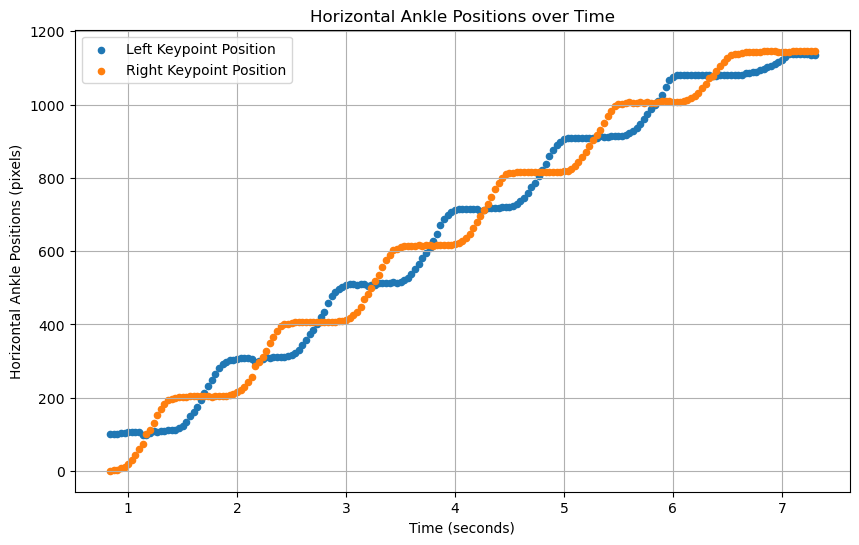

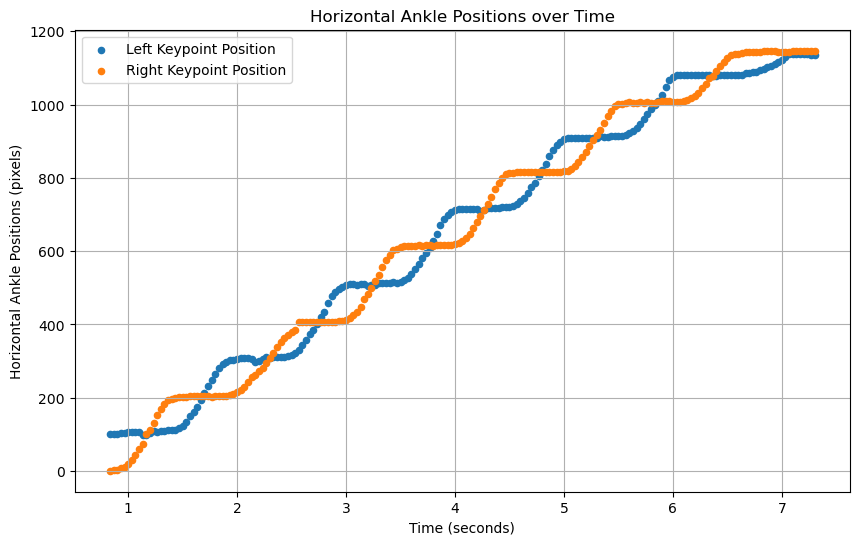

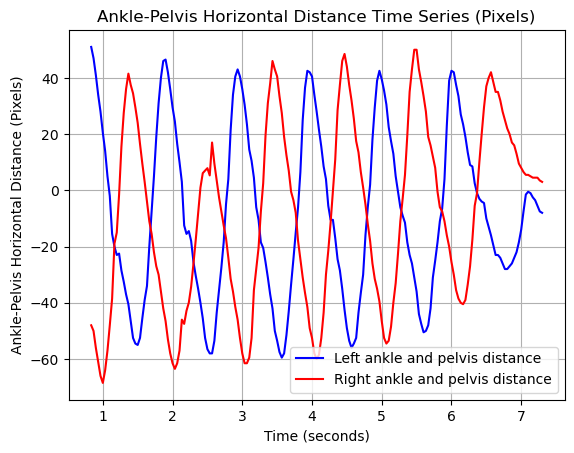

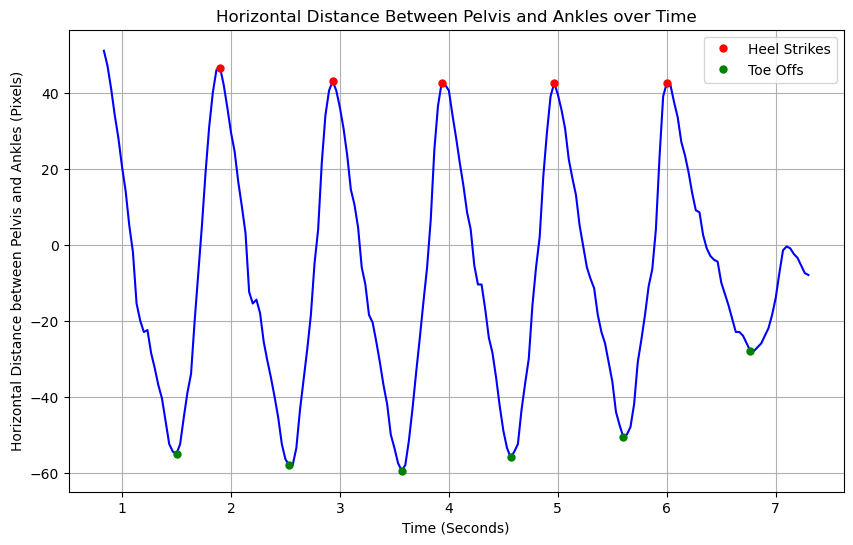

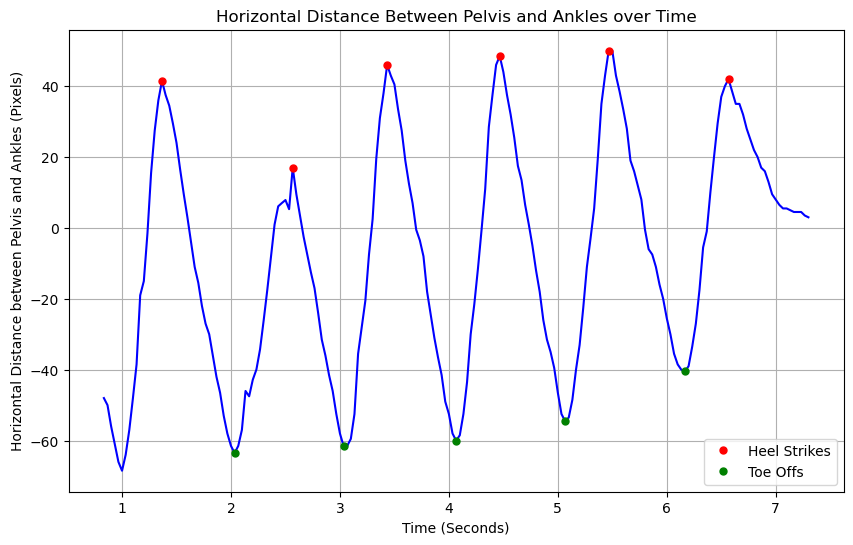

Left Heel Strikes:
 [[ 1.9        46.5       ]
 [ 2.93333333 43.        ]
 [ 3.93333333 42.5       ]
 [ 4.96666667 42.5       ]
 [ 6.         42.5       ]]

Right Heel Strikes:
 [[ 1.36666667 41.5       ]
 [ 2.56666667 17.        ]
 [ 3.43333333 46.        ]
 [ 4.46666667 48.5       ]
 [ 5.46666667 50.        ]
 [ 6.56666667 42.        ]]


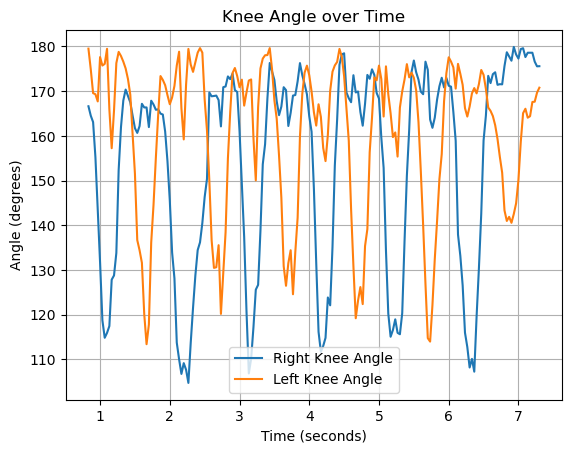

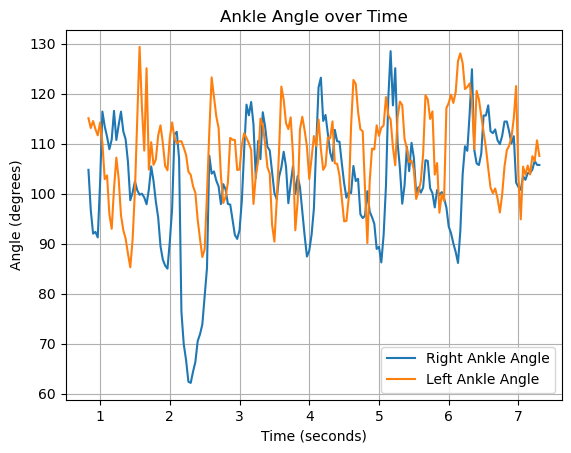

1280
6.3
<generator object calc_step_length.<locals>.<genexpr> at 0x000001CBB02A3840>
1280
6.3
<generator object calc_step_length.<locals>.<genexpr> at 0x000001CBB02A3840>


,left_step_time_mean,left_step_time_std,right_step_time_mean,right_step_time_std,left_stance_mean,left_stance_std,right_stance_mean,right_stance_std,left_swing_mean,left_swing_std,...,dst_mean,dst_std,left_step_length_mean,left_step_length_std,right_step_length_mean,right_step_length_std,left_gait_speed_mean,left_gait_speed_std,right_gait_speed_mean,right_gait_speed_std
0,1.025,0.014434,1.04,0.110353,0.66,0.053333,0.613333,0.080554,0.393333,0.013333,...,0.533333,0.293561,0.956074,0.049388,0.986836,0.029014,0.956074,0.049388,0.986836,0.029014


In [19]:
VIDEO_FOLDER = "sagittal_videos"

EXTREMA_WINDOW = 5
WALKWAY_LENGTH = 6.3;

file_list = os.listdir(VIDEO_FOLDER)

video_files = [filename for filename in file_list if filename.endswith(('.avi', '.mp4'))]

df_features = pd.DataFrame()

for video_filename in video_files:
    video_path = os.path.join(VIDEO_FOLDER, video_filename)
    
    pose_model = PoseEstimationModel(video_path)
    pose_model.display_video_with_keypoints()
    df, frame_width = pose_model.create_keypoint_dataframe()
    
    time_col = df['time']
    
    # Graph initial keypoint positions
    plot_keypoints(time_col, df['left_ankle_x'], df['right_ankle_x'])
    
    # Swap incorrectly labeled left right keypoints
    switch_left_right(df, 'left_ankle_x', 'right_ankle_x', threshold=25, window_size=3)
    plot_keypoints(time_col, df['left_ankle_x'], df['right_ankle_x'])
    
    # Add columns for the distance between ankles and the pelvis
    df['right_ankle_pelvis_x'] = calc_distance_ankle_pelvis(df, df['right_ankle_x'])
    df['left_ankle_pelvis_x'] = calc_distance_ankle_pelvis(df, df['left_ankle_x'])
    
    right_ankle_pelvis_col = df['right_ankle_pelvis_x']
    left_ankle_pelvis_col = df['left_ankle_pelvis_x']
    
    graph_ankle_pelvis_distance(time_col, left_ankle_pelvis_col, right_ankle_pelvis_col)
    
    # Get times and positions of heel strikes and toe-offs
    left_heel_strikes = find_maxima(time_col, left_ankle_pelvis_col, EXTREMA_WINDOW)
    right_heel_strikes = find_maxima(time_col, right_ankle_pelvis_col, EXTREMA_WINDOW)
    left_toe_offs = find_minima(time_col, left_ankle_pelvis_col, EXTREMA_WINDOW)
    right_toe_offs = find_minima(time_col, right_ankle_pelvis_col, EXTREMA_WINDOW)
    
    # Ankle pelvis graphs with extrema plotted
    graph_extrema(time_col, left_ankle_pelvis_col, left_heel_strikes, left_toe_offs)
    graph_extrema(time_col, right_ankle_pelvis_col, right_heel_strikes, right_toe_offs)
    
    print("Left Heel Strikes:\n", left_heel_strikes)
    print("\nRight Heel Strikes:\n", right_heel_strikes)
    
    # Calculate ankle and knee angles over time
    add_keypoint_angles(df)
    graphKneeAngles(df)
    graphAnkleAngles(df)
    
    # Calculate features for the current video
    features = get_features(df, left_heel_strikes, right_heel_strikes, left_toe_offs, right_toe_offs, frame_width, WALKWAY_LENGTH)
    
    # Add the features to the DataFrame
    df_features = pd.concat([df_features, features], ignore_index=True)

df_features.head()
    